<a href="https://colab.research.google.com/github/MiguelFigueroa02/alura_Machine_Learning/blob/main/Ej_Clas_val_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [19]:
import pandas as pd


In [20]:
url = 'https://raw.githubusercontent.com/MiguelFigueroa02/alura_Machine_Learning/refs/heads/main/metricas/diabetes.csv'
datos = pd.read_csv(url)

In [21]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [22]:
datos.nunique()

,0
glicemia,37
presion_sanguinea,48
grasa_subcutanea_triceps,185
insulina,195
imc,332
diabetes,2


In [23]:
datos.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [24]:
X = datos.drop('diabetes', axis=1)
y = datos['diabetes']

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo  con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.7571428571428571
La exactitud del modelo  con el conjunto de validación es de: 0.776595744680851


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
modelo_ejercicio = RandomForestClassifier(max_depth = 2)
modelo_ejercicio.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo_ejercicio.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo_ejercicio.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7285714285714285
Precisión de validación: 0.7021276595744681


 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

- Evaluación modelo de arbol

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[52 11]
 [10 21]]


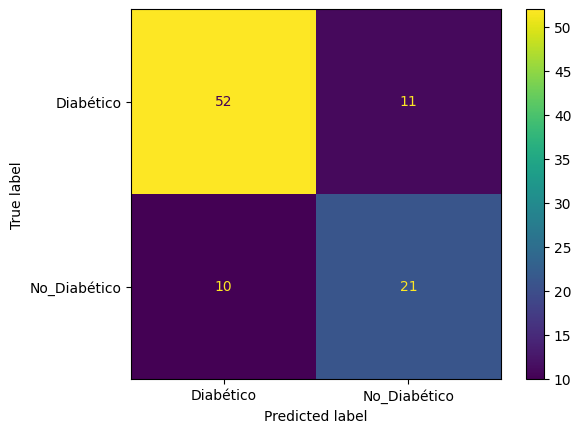

In [34]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Diabético', 'No_Diabético'])
visualizacion.plot();

- Evaluación de método random forrest

In [35]:
y_prev = modelo_ejercicio.predict(X_val)
matriz_confusion_ej = confusion_matrix(y_val, y_prev)
print(matriz_confusion_ej)

[[60  3]
 [25  6]]


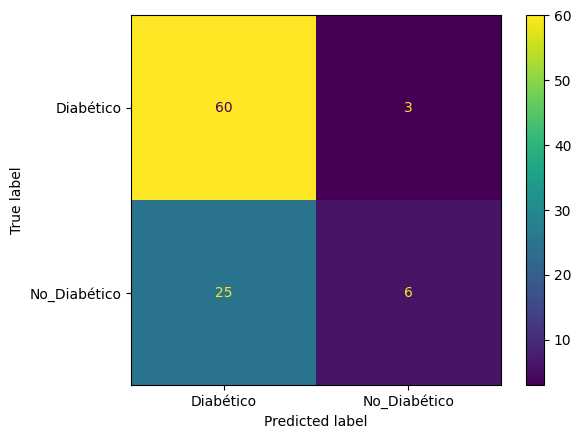

In [36]:
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_ej, display_labels=['Diabético', 'No_Diabético'])
vis.plot();

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
print(f'La precision del modelo es:{precision_score(y_val, y_previsto)}')

La precision del modelo es:0.65625


In [40]:
print(f'La sensibilidad (Recall) del modelo es:{recall_score(y_val, y_previsto)}')

La sensibilidad (Recall) del modelo es:0.6774193548387096


In [41]:
print(f'La exactitud (accuracy) del modelo es:{accuracy_score(y_val, y_previsto)}')

La exactitud (accuracy) del modelo es:0.776595744680851


In [42]:
print(f'El F1 del modelo es:{f1_score(y_val, y_previsto)}')

El F1 del modelo es:0.6666666666666666


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

In [43]:
 from sklearn.metrics import RocCurveDisplay

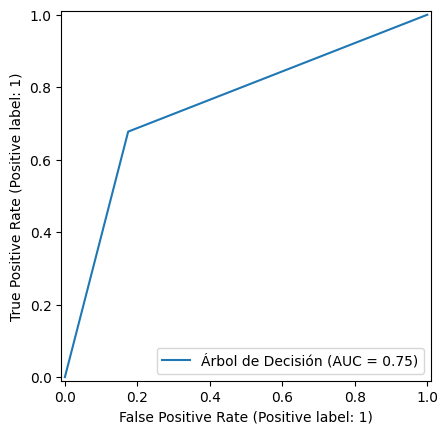

In [44]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión')

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

In [45]:
from sklearn.metrics import PrecisionRecallDisplay

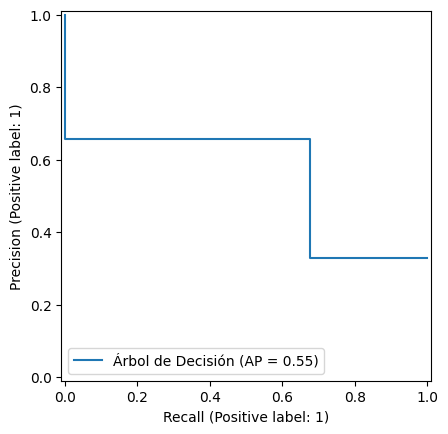

In [46]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [47]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

